<a href="https://colab.research.google.com/github/lumimevi/Python_repository/blob/master/Vari%C3%A1veis_Aleat%C3%B3rias_Discretas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Variáveis Aleatórias Discretas**

Lourdes Milagros Mendoza Villavicencio

# Questão Nº1

O presidente da Martin Corporation está considerando duas alternativas de investimento X e Y. Se cada uma das
alternativas for levada a diante há 4 possibilidades de resultado. O valor presente líquido e sua respectiva
probabilidade de ocorrência são mostrados abaixo:




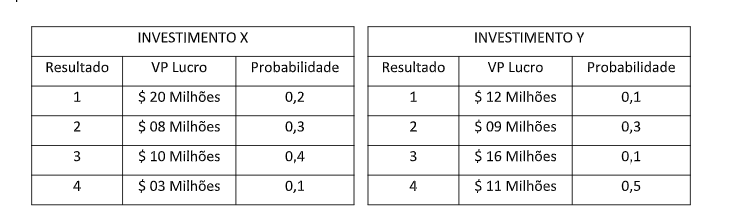

a. Qual é o valor esperado do valor presente do lucro para os investimentos X e Y? E qual das oportunidades é a mais interessante (maior valor esperado do VPLucro)?

b. Qual a variância do valor presente do lucro para os investimentos X e Y? E qual das oportunidades é a mais
arriscada (maior variância do VPLucro)?

**Análise de Alternativas de Investimento X e Y**

Calculando o valor esperado (média) e a variância para cada investimento para determinar qual é mais interessante e qual é mais arriscado.

In [1]:
import pandas as pd
import numpy as np

print("--- 1. Análise de Alternativas de Investimento X e Y ---")

# Dados para o Investimento X
data_x = {
    'Resultado': [1, 2, 3, 4],
    'VPL_Lucro_Milhoes': [20, 8, 10, 3],
    'Probabilidade': [0.2, 0.3, 0.4, 0.1]
}
df_x = pd.DataFrame(data_x)

# Dados para o Investimento Y
data_y = {
    'Resultado': [1, 2, 3, 4],
    'VPL_Lucro_Milhoes': [12, 9, 16, 11],
    'Probabilidade': [0.1, 0.3, 0.1, 0.5]
}
df_y = pd.DataFrame(data_y)

# (a) Qual é o valor esperado do valor presente do lucro para os investimentos X e Y?
# Valor Esperado (E[X]) = Sum(x * P(x))

# Investimento X
df_x['VPL_x_Prob'] = df_x['VPL_Lucro_Milhoes'] * df_x['Probabilidade']
expected_vpl_x = df_x['VPL_x_Prob'].sum()
print(f"\n(a) Valor Esperado do VPL para o Investimento X: ${expected_vpl_x:.2f} Milhões")

# Investimento Y
df_y['VPL_y_Prob'] = df_y['VPL_Lucro_Milhoes'] * df_y['Probabilidade']
expected_vpl_y = df_y['VPL_y_Prob'].sum()
print(f"    Valor Esperado do VPL para o Investimento Y: ${expected_vpl_y:.2f} Milhões")

# Qual das oportunidades é a mais interessante (maior valor esperado do VPLucro)?
if expected_vpl_x > expected_vpl_y:
    print(f"    A oportunidade mais interessante (maior VPL esperado) é o Investimento X.")
elif expected_vpl_y > expected_vpl_x:
    print(f"    A oportunidade mais interessante (maior VPL esperado) é o Investimento Y.")
else:
    print(f"    Ambas as oportunidades têm o mesmo VPL esperado.")

# (b) Qual a variância do valor presente do lucro para os investimentos X e Y?
# Variância (Var[X]) = E[X^2] - (E[X])^2
# Ou Var[X] = Sum((x - E[X])^2 * P(x))

# Investimento X
df_x['Diff_Sq_x'] = (df_x['VPL_Lucro_Milhoes'] - expected_vpl_x)**2
df_x['Diff_Sq_x_Prob'] = df_x['Diff_Sq_x'] * df_x['Probabilidade']
variance_x = df_x['Diff_Sq_x_Prob'].sum()
print(f"\n(b) Variância do VPL para o Investimento X: {variance_x:.2f} (Milhões de Dólares)^2")

# Investimento Y
df_y['Diff_Sq_y'] = (df_y['VPL_Lucro_Milhoes'] - expected_vpl_y)**2
df_y['Diff_Sq_y_Prob'] = df_y['Diff_Sq_y'] * df_y['Probabilidade']
variance_y = df_y['Diff_Sq_y_Prob'].sum()
print(f"    Variância do VPL para o Investimento Y: {variance_y:.2f} (Milhões de Dólares)^2")

# Qual das oportunidades é a mais arriscada (maior variância do VPLucro)?
if variance_x > variance_y:
    print(f"    A oportunidade mais arriscada (maior variância) é o Investimento X.")
elif variance_y > variance_x:
    print(f"    A oportunidade mais arriscada (maior variância) é o Investimento Y.")
else:
    print(f"    Ambas as oportunidades têm a mesma variância (risco).")


--- 1. Análise de Alternativas de Investimento X e Y ---

(a) Valor Esperado do VPL para o Investimento X: $10.70 Milhões
    Valor Esperado do VPL para o Investimento Y: $11.00 Milhões
    A oportunidade mais interessante (maior VPL esperado) é o Investimento Y.

(b) Variância do VPL para o Investimento X: 25.61 (Milhões de Dólares)^2
    Variância do VPL para o Investimento Y: 3.80 (Milhões de Dólares)^2
    A oportunidade mais arriscada (maior variância) é o Investimento X.


# Questão Nº2

Uma empresa de cristais finos sabe por experiência que 10% de suas taças possuem defeitos cosméticos e devem ser
classificadas como “de segunda linha”.

a. Entre seis taças selecionadas aleatoriamente, qual é a probabilidade de uma ser de segunda linha?

b. Entre seis taças selecionadas aleatoriamente, qual é a probabilidade de no mínimo duas serem de segunda linha?

c. Se as taças forem examinadas uma a uma, qual será a probabilidade de no máximo cinco terem de ser selecionadas
para encontrar quatro que não sejam de segunda linha?

**Taças com Defeito (Distribuição Binomial)**

Este problema envolve a distribuição binomial, pois estamos lidando com um número fixo de tentativas (taças selecionadas) e dois resultados possíveis (defeito ou não defeito).

In [5]:
from scipy.stats import binom

print("\n--- 2. Taças com Defeito ---")

# Parâmetros da distribuição binomial
n = 6  # Número de taças selecionadas
p = 0.10 # Probabilidade de uma taça ter defeito (ser de segunda linha)
q = 1 - p # Probabilidade de uma taça NÃO ter defeito

# (a) Entre seis taças selecionadas aleatoriamente, qual é a probabilidade de uma ser de segunda linha?
# P(X = 1)
prob_um_defeito = binom.pmf(1, n, p)
print(f"\n(a) Probabilidade de uma taça ser de segunda linha (P(X=1)): {prob_um_defeito:.4f}")

# (b) Entre seis taças selecionadas aleatoriamente, qual é a probabilidade de no mínimo duas serem de segunda linha?
# P(X >= 2) = 1 - P(X < 2) = 1 - [P(X=0) + P(X=1)]
prob_zero_defeitos = binom.pmf(0, n, p)
prob_um_defeito = binom.pmf(1, n, p) # Já calculamos, mas para clareza
prob_min_duas_defeito = 1 - (prob_zero_defeitos + prob_um_defeito)
print(f"(b) Probabilidade de no mínimo duas serem de segunda linha (P(X>=2)): {prob_min_duas_defeito:.4f}")

# (c) Se as taças forem examinadas uma a uma, qual será a probabilidade de no máximo cinco terem de ser selecionadas
# para encontrar quatro que não sejam de segunda linha?
# Este é um problema de distribuição Binomial Negativa (número de tentativas até um número fixo de sucessos).
# Aqui, o "sucesso" é encontrar uma taça que NÃO seja de segunda linha.
# k = 4 (número de sucessos desejados)
# p_sucesso = q = 0.90 (probabilidade de NÃO ter defeito)
# x = número de tentativas até o k-ésimo sucesso. Queremos P(X <= 5)

# A pergunta significa que a 4ª taça não-defeitosa é encontrada na 4ª ou 5ª seleção.
# P(X=4) (4ª não-defeitosa é a 4ª taça selecionada)
# P(X=5) (4ª não-defeitosa é a 5ª taça selecionada)

# Para X=4 (4 seleções para 4 não-defeitos): C(3,3) * (0.90)^4 * (0.10)^0  (binomial negativa: (x-1 choose k-1) * p^k * (1-p)^(x-k) )
# Se todas as 4 primeiras taças não tiverem defeito.
prob_4_selecoes_para_4_nao_defeitos = (q**4)

# Para X=5 (5 seleções para 4 não-defeitos): A 4ª não-defeitosa ocorre na 5ª seleção.
# Isso significa que, nas primeiras 4 seleções, houve 3 não-defeitos e 1 defeito.
# C(4,3) * (0.90)^3 * (0.10)^1
prob_5_selecoes_para_4_nao_defeitos = binom.pmf(3, 4, q) * q # (4 escolhe 3) * q^3 * p^1 * q (o último q é a 4a taça não-defeituosa)
# Ou, mais precisamente para binomial negativa: (x-1, k-1) * p^k * (1-p)^(x-k)
# P(X=4 | k=4, p=0.9) = (4-1 choose 4-1) * 0.9^4 * (1-0.9)^(4-4) = (3 choose 3) * 0.9^4 * 0.1^0 = 1 * 0.9^4 = 0.6561
# P(X=5 | k=4, p=0.9) = (5-1 choose 4-1) * 0.9^4 * (1-0.9)^(5-4) = (4 choose 3) * 0.9^4 * 0.1^1 = 4 * 0.6561 * 0.1 = 0.26244

from scipy.stats import nbinom

# Usando a função de massa de probabilidade (pmf) da distribuição binomial negativa
# nbinom.pmf(k, n, p) onde k é o número de falhas antes do n-ésimo sucesso.
# Em nosso caso, k = número de sucessos (4 não-defeitos), prob = probabilidade de sucesso (q = 0.9)
# x = número de tentativas. O pmf de scipy espera "k" falhas para "r" sucessos.
# Então, o número de falhas é x - r.

# P(X <= 5) para encontrar 4 não-defeitos: P(X=4) + P(X=5)
# P(X=4): 4 sucessos em 4 tentativas, 0 falhas. (n_falhas = 0, n_sucessos = 4, p_sucesso = 0.9)
prob_c_x4 = nbinom.pmf(0, 4, q) # 0 falhas antes do 4º sucesso
# P(X=5): 4 sucessos em 5 tentativas, 1 falha. (n_falhas = 1, n_sucessos = 4, p_sucesso = 0.9)
prob_c_x5 = nbinom.pmf(1, 4, q) # 1 falha antes do 4º sucesso

prob_no_max_cinco_selecoes = prob_c_x4 + prob_c_x5
print(f"(c) Probabilidade de no máximo cinco taças serem selecionadas para encontrar quatro não de segunda linha: {prob_no_max_cinco_selecoes:.4f}")



--- 2. Taças com Defeito ---

(a) Probabilidade de uma taça ser de segunda linha (P(X=1)): 0.3543
(b) Probabilidade de no mínimo duas serem de segunda linha (P(X>=2)): 0.1143
(c) Probabilidade de no máximo cinco taças serem selecionadas para encontrar quatro não de segunda linha: 0.9185


# Questão Nº3

Um contador eletrônico de bactérias registra, em média, cinco bactérias por cm 3 de um líquido. Admitindo-se que esta variável tenha distribuição de Poisson,

a. Qual é o desvio padrão do número de bactérias por cm 3 ?

b. Encontre a probabilidade de que pelo menos duas bactérias ocorram num volume de líquido de 2 cm 3 .

**Contador Eletrônico de Bactérias (Distribuição de Poisson)**

Este problema utiliza a distribuição de Poisson, que é adequada para eventos que ocorrem em um intervalo de tempo ou espaço

In [6]:
from scipy.stats import poisson

print("\n--- 3. Contador Eletrônico de Bactérias ---")

# Média de bactérias por cm^3
lambda_per_cm3 = 5

# (a) Qual é o desvio padrão do número de bactérias por cm^3?
# Para a distribuição de Poisson, a variância é igual à média (lambda).
# O desvio padrão é a raiz quadrada da variância.
desvio_padrao = np.sqrt(lambda_per_cm3)
print(f"\n(a) Desvio padrão do número de bactérias por cm^3: {desvio_padrao:.4f}")

# (b) Encontre a probabilidade de que pelo menos duas bactérias ocorram num volume de líquido de 2 cm^3.
# A nova média (lambda) para 2 cm^3 será o dobro da média para 1 cm^3.
lambda_2cm3 = lambda_per_cm3 * 2
print(f"    Nova média (lambda) para 2 cm^3: {lambda_2cm3}")

# P(X >= 2) = 1 - P(X < 2) = 1 - [P(X=0) + P(X=1)]
prob_zero_bacterias = poisson.pmf(0, lambda_2cm3)
prob_uma_bacteria = poisson.pmf(1, lambda_2cm3)
prob_pelo_menos_duas_bacterias = 1 - (prob_zero_bacterias + prob_uma_bacteria)
print(f"(b) Probabilidade de que pelo menos duas bactérias ocorram em 2 cm^3: {prob_pelo_menos_duas_bacterias:.4f}")


--- 3. Contador Eletrônico de Bactérias ---

(a) Desvio padrão do número de bactérias por cm^3: 2.2361
    Nova média (lambda) para 2 cm^3: 10
(b) Probabilidade de que pelo menos duas bactérias ocorram em 2 cm^3: 0.9995


# Questão Nº4

Certo tipo de câmera digital é oferecida em duas versões de três megapixel e quatro megapixel. Uma loja de câmeras recebeu uma encomenda de 15 dessas câmeras, das quais seis com resolução de três megapixel. Suponha que cinco
delas sejam selecionadas aleatoriamente para serem estocadas atrás do balcão. As outras 10 são colocadas na área de armazenagem. Seja X número de câmeras de três megapixel entre as cinco selecionadas para armazenagem atrás
do balcão.

a. Que tipo de distribuição tem X (nome e valores de todos os parâmetros)?

b. Calcule P(X = 2), P(X &lt;= 2) e P(X &gt;=2).

c. Calcule o valor médio e o desvio padrão de X.

**Câmeras Digitais (Distribuição Hipergeométrica)**

Este é um problema de distribuição hipergeométrica, pois estamos selecionando uma amostra sem reposição de uma população finita e heterogênea.

In [7]:
from scipy.stats import hypergeom

print("\n--- 4. Câmeras Digitais ---")

# Parâmetros da distribuição hipergeométrica
# N = Tamanho total da população (Total de câmeras) = 15
# K = Número de sucessos na população (Câmeras de três megapixel) = 6
# n = Tamanho da amostra (Câmeras selecionadas para o balcão) = 5

N = 15
K = 6
n = 5

# (a) Que tipo de distribuição tem X (nome e valores de todos os parâmetros)?
print(f"\n(a) A variável X segue uma **Distribuição Hipergeométrica**.")
print(f"    Parâmetros:")
print(f"    - Tamanho total da população (N): {N}")
print(f"    - Número de itens do tipo 'sucesso' na população (K): {K} (câmeras de três megapixel)")
print(f"    - Tamanho da amostra (n): {n} (câmeras selecionadas para o balcão)")

# (b) Calcule P(X = 2), P(X <= 2) e P(X >= 2).
# P(X = 2)
prob_x_igual_2 = hypergeom.pmf(2, N, K, n)
print(f"\n(b) P(X = 2) (probabilidade de 2 câmeras de três megapixel na amostra): {prob_x_igual_2:.4f}")

# P(X <= 2) = P(X=0) + P(X=1) + P(X=2)
prob_x_menor_igual_2 = hypergeom.cdf(2, N, K, n)
print(f"    P(X <= 2) (probabilidade de no máximo 2 câmeras de três megapixel na amostra): {prob_x_menor_igual_2:.4f}")

# P(X >= 2) = 1 - P(X < 2) = 1 - P(X <= 1)
prob_x_maior_igual_2 = 1 - hypergeom.cdf(1, N, K, n)
print(f"    P(X >= 2) (probabilidade de no mínimo 2 câmeras de três megapixel na amostra): {prob_x_maior_igual_2:.4f}")

# (c) Calcule o valor médio e o desvio padrão de X.
# Valor Médio (Esperança) E[X] = n * (K / N)
valor_medio_x = n * (K / N)

# Variância Var[X] = n * (K/N) * (1 - K/N) * ((N-n)/(N-1))
variance_x = n * (K/N) * (1 - K/N) * ((N-n)/(N-1))

# Desvio Padrão = sqrt(Variância)
desvio_padrao_x = np.sqrt(variance_x)

print(f"\n(c) Valor Médio (Esperança) de X: {valor_medio_x:.4f}")
print(f"    Desvio Padrão de X: {desvio_padrao_x:.4f}")


--- 4. Câmeras Digitais ---

(a) A variável X segue uma **Distribuição Hipergeométrica**.
    Parâmetros:
    - Tamanho total da população (N): 15
    - Número de itens do tipo 'sucesso' na população (K): 6 (câmeras de três megapixel)
    - Tamanho da amostra (n): 5 (câmeras selecionadas para o balcão)

(b) P(X = 2) (probabilidade de 2 câmeras de três megapixel na amostra): 0.4196
    P(X <= 2) (probabilidade de no máximo 2 câmeras de três megapixel na amostra): 0.7133
    P(X >= 2) (probabilidade de no mínimo 2 câmeras de três megapixel na amostra): 0.7063

(c) Valor Médio (Esperança) de X: 2.0000
    Desvio Padrão de X: 0.9258


# Questão Nº5

Uma limusine de aeroporto pode acomodar até quatro passageiros em qualquer corrida. A empresa aceitará um máximo de seis reservas e os passageiros devem ter reservas. Pelos registros anteriores, 20% de todos os que fazem reservas não aparecem para a corrida. Responda as seguintes perguntas, assumindo independência quando apropriado.

a. Se forem feitas seis reservas, qual é a probabilidade de ao menos um indivíduo com reserva não poder ser acomodado na corrida?

b. Se forem feitas seis reservas, qual é o número esperado de lugares disponíveis quando a limusine parte?

c. Suponha que a distribuição de probabilidade do número de reservas feitas seja dada na tabela a seguir.

**Limusine de Aeroporto (Distribuições Binomial e Personalizada)**

Este problema combina a distribuição binomial para o número de passageiros que aparecem e uma análise da função de probabilidade do número de reservas.

In [8]:
from scipy.stats import binom

print("\n--- 5. Limusine de Aeroporto ---")

# Capacidade da limusine
capacidade_limusine = 4

# Máximo de reservas aceitas
max_reservas = 6

# Probabilidade de um passageiro com reserva NÃO aparecer
p_nao_aparecer = 0.20
p_aparecer = 1 - p_nao_aparecer # Probabilidade de aparecer

# (a) Se forem feitas seis reservas, qual é a probabilidade de ao menos um indivíduo com reserva não poder ser acomodado na corrida?
# Isso significa que o número de passageiros que aparecem (X) é maior que a capacidade da limusine (4).
# Se 6 reservas são feitas, X ~ Binomial(n=6, p=p_aparecer)
n_reservas_a = 6
X_a = [5, 6] # Número de passageiros que apareceriam e não poderiam ser acomodados

prob_x_5_aparicoes = binom.pmf(5, n_reservas_a, p_aparecer)
prob_x_6_aparicoes = binom.pmf(6, n_reservas_a, p_aparecer)

prob_nao_acomodado = prob_x_5_aparicoes + prob_x_6_aparicoes
print(f"\n(a) Probabilidade de ao menos um indivíduo com reserva não poder ser acomodado (com 6 reservas): {prob_nao_acomodado:.4f}")

# (b) Se forem feitas seis reservas, qual é o número esperado de lugares disponíveis quando a limusine parte?
# Número esperado de passageiros que aparecem = n_reservas * p_aparecer
expected_passageiros_presentes = n_reservas_a * p_aparecer
print(f"\n(b) Número esperado de passageiros presentes (com 6 reservas): {expected_passageiros_presentes:.2f}")

# O número de lugares ocupados será o mínimo entre a capacidade e o número de passageiros presentes.
# No entanto, a pergunta é sobre lugares DISPONÍVEIS.
# Lugares disponíveis = Capacidade - Lugares Ocupados
# Para calcular o número esperado de lugares disponíveis, precisamos considerar todos os cenários.
# Se `P_presentes` é o número de passageiros que aparecem:
# Lugares Ocupados = min(P_presentes, capacidade_limusine)
# Lugares Disponíveis = capacidade_limusine - min(P_presentes, capacidade_limusine)

# Vamos calcular a distribuição de probabilidade do número de passageiros que realmente aparecem
# para n=6 reservas e p=0.8 de aparecer.
# P(X=k) para k de 0 a 6
prob_aparicoes = {}
for k in range(n_reservas_a + 1):
    prob_aparicoes[k] = binom.pmf(k, n_reservas_a, p_aparecer)

# Calcular o número de lugares disponíveis para cada k
lugares_disponiveis = {}
for k, prob in prob_aparicoes.items():
    ocupados = min(k, capacidade_limusine)
    disponiveis = capacidade_limusine - ocupados
    lugares_disponiveis[disponiveis] = lugares_disponiveis.get(disponiveis, 0) + prob

# Número esperado de lugares disponíveis = Sum(disponiveis * P(disponiveis))
expected_lugares_disponiveis = sum(d * p for d, p in lugares_disponiveis.items())
print(f"    Número esperado de lugares disponíveis (com 6 reservas): {expected_lugares_disponiveis:.4f}")


# (c) Suponha que a distribuição de probabilidade do número de reservas feitas seja dada na tabela a seguir.
# Calcule a função de distribuição de probabilidade de X (número de passageiros de uma corrida selecionada aleatoriamente).

print("\n(c) Função de Distribuição de Probabilidade do Número de Passageiros (X):")

# Tabela de probabilidade do número de reservas feitas
prob_reservas = {
    3: 0.1,
    4: 0.2,
    5: 0.3,
    6: 0.4
}

# Possíveis números de passageiros que realmente aparecem (X)
# X pode ir de 0 até a capacidade máxima da limusine (4), pois mais do que isso não pode ser acomodado.
# X também pode ir até o número máximo de reservas (6), mas a limusine só acomoda 4.

# Vamos calcular P(X=k) para k = 0, 1, 2, 3, 4
# P(X=k) = Sum_{n_res} P(X=k | n_res) * P(n_res)

# Para X=0, 1, 2, 3:
# P(X=k | n_res) é a pmf da binomial(n_res, p_aparecer)
# Para X=4 (caso especial, pois a capacidade é 4):
# P(X=4) = P(4 passageiros aparecem | 4 reservas) * P(4 reservas)
#        + P(4 passageiros aparecem | 5 reservas) * P(5 reservas)
#        + P(4 passageiros aparecem | 6 reservas) * P(6 reservas)
#        + P(5 ou mais passageiros aparecem | 5 reservas) * P(5 reservas) (todos que aparecerem acima de 4 serão 4 na limusine)
#        + P(5 ou mais passageiros aparecem | 6 reservas) * P(6 reservas)

prob_X_valores = {}
for num_passageiros_atuais in range(capacidade_limusine + 1): # X pode ser 0, 1, 2, 3, 4
    prob_X_valores[num_passageiros_atuais] = 0.0

    for num_res, prob_res in prob_reservas.items():
        if num_passageiros_atuais < capacidade_limusine:
            # Para k < 4, a probabilidade é direta da binomial
            prob_X_valores[num_passageiros_atuais] += binom.pmf(num_passageiros_atuais, num_res, p_aparecer) * prob_res
        else: # num_passageiros_atuais == capacidade_limusine (ou seja, 4)
            # P(X=4) significa 4 ou mais passageiros apareceram, mas apenas 4 foram acomodados.
            # P(X>=4 | n_res) * P(n_res)
            # P(X>=4 | n_res) = 1 - P(X <= 3 | n_res)
            prob_X_valores[num_passageiros_atuais] += (1 - binom.cdf(capacidade_limusine - 1, num_res, p_aparecer)) * prob_res

# Imprimir a função de distribuição de probabilidade de X
for x_val, prob in prob_X_valores.items():
    print(f"    P(X = {x_val}): {prob:.4f}")

# Verificação (opcional): A soma das probabilidades deve ser 1
total_prob_X = sum(prob_X_valores.values())
print(f"    Soma total das probabilidades P(X): {total_prob_X:.4f}")


--- 5. Limusine de Aeroporto ---

(a) Probabilidade de ao menos um indivíduo com reserva não poder ser acomodado (com 6 reservas): 0.6554

(b) Número esperado de passageiros presentes (com 6 reservas): 4.80
    Número esperado de lugares disponíveis (com 6 reservas): 0.1175

(c) Função de Distribuição de Probabilidade do Número de Passageiros (X):
    P(X = 0): 0.0012
    P(X = 1): 0.0173
    P(X = 2): 0.0906
    P(X = 3): 0.2273
    P(X = 4): 0.6636
    Soma total das probabilidades P(X): 1.0000
